<a href="https://colab.research.google.com/github/WoojinJeonkr/DeepLearning/blob/main/Convolutional_autoencoder_for_image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 노이즈 제거를 위한 Convolutional autoencoder
- 내용 출처: https://keras.io/examples/vision/autoencoder/
- 목표: 이미지 노이즈 제거를 위한 deep convolutional autoencoder를 구현하고   
MNIST 데이터 세트의 노이즈가 있는 숫자 이미지를 깨끗한 숫자 이미지로 매핑

## 01. 라이브러리 불러오기

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

## 02. 설정

In [2]:
# 제공된 배열 정규화, 재구성 함수 정의
def preprocess(array):
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

In [3]:
# 제공된 배열의 각 이미지에 노이즈 추가 함수 정의
def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )
    return np.clip(noisy_array, 0.0, 1.0)

In [4]:
# 제공된 배열에서 10개의 이미지 시각화 함수 정의
def display(array1, array2):
    n = 10 # 표시할 이미지 수 정의

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

## 03. 데이터 준비

11501568/11490434 [==============================] - 0s 0us/step


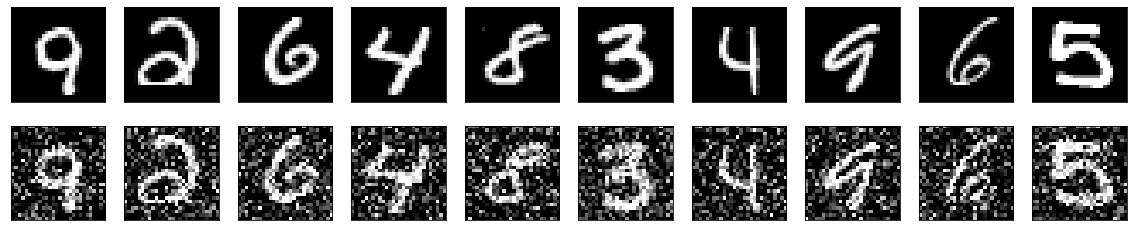

In [5]:
# 데이터 불러오기
(train_data, _), (test_data, _) = mnist.load_data()

# 데이터 정규화
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# 각 데이터에 노이즈 추가
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# 이미지 시각화
display(train_data, noisy_train_data)

In [6]:
# 첫번째 줄의 이미지가 원본 이미지들이고 두번째 줄의 이미지가 노이즈가 추가된 이미지들이다

## 04. autoencoder 생성
- Fuctional API를 사용하여 convolutional autoencoder 생성

In [7]:
input = layers.Input(shape=(28, 28, 1))

# 인코더
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# 디코더
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [8]:
# autoencoder 훈련
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 147s 311ms/step - loss: 0.1320 - val_loss: 0.0728
Epoch 2/50
469/469 [==============================] - 147s 313ms/step - loss: 0.0714 - val_loss: 0.0694
Epoch 3/50
469/469 [==============================] - 146s 311ms/step - loss: 0.0691 - val_loss: 0.0679
Epoch 4/50
469/469 [==============================] - 146s 312ms/step - loss: 0.0679 - val_loss: 0.0669
Epoch 5/50
469/469 [==============================] - 146s 311ms/step - loss: 0.0671 - val_loss: 0.0664
Epoch 6/50
469/469 [==============================] - 146s 312ms/step - loss: 0.0665 - val_loss: 0.0658
Epoch 7/50
469/469 [==============================] - 147s 314ms/step - loss: 0.0661 - val_loss: 0.0655
Epoch 8/50
469/469 [==============================] - 146s 312ms/step - loss: 0.0658 - val_loss: 0.0652
Epoch 9/50
469/469 [==============================] - 145s 309ms/step - loss: 0.0654 - val_loss: 0.0649
Epoch 10/50
469/469 [==============================] - 145s 310m

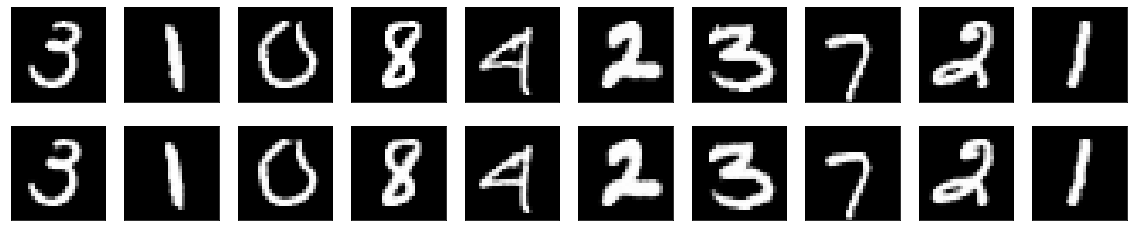

In [9]:
# 원본 이미지에 대한 예측 확인
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [10]:
# 노이즈가 있는 이미지를 입력 대상으로 사용하여 훈련
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 147s 314ms/step - loss: 0.1029 - val_loss: 0.0950
Epoch 2/100
469/469 [==============================] - 146s 312ms/step - loss: 0.0943 - val_loss: 0.0927
Epoch 3/100
469/469 [==============================] - 147s 313ms/step - loss: 0.0926 - val_loss: 0.0914
Epoch 4/100
469/469 [==============================] - 147s 314ms/step - loss: 0.0915 - val_loss: 0.0905
Epoch 5/100
469/469 [==============================] - 147s 314ms/step - loss: 0.0907 - val_loss: 0.0897
Epoch 6/100
469/469 [==============================] - 147s 313ms/step - loss: 0.0901 - val_loss: 0.0892
Epoch 7/100
469/469 [==============================] - 147s 313ms/step - loss: 0.0896 - val_loss: 0.0888
Epoch 8/100
469/469 [==============================] - 147s 313ms/step - loss: 0.0891 - val_loss: 0.0883
Epoch 9/100
469/469 [==============================] - 146s 312ms/step - loss: 0.0888 - val_loss: 0.0880
Epoch 10/100
469/469 [==============================] -

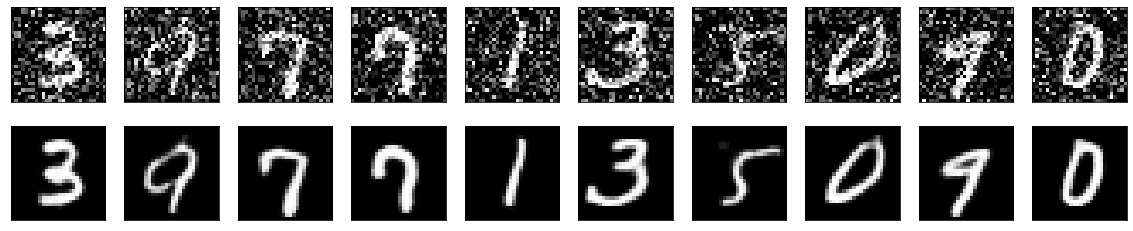

In [11]:
# 이미지 노이즈가 있는 데이터에서 원본을 예측
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)